In [ ]:
import pandas as pd
import math
import datetime
import statistics
import numpy as np
import matplotlib.pyplot as plt
import datetime
from helper.bus_count import buses
from helper.src_dict import src_dict
from helper.precompute import merged_list
from helper.utils import hour_to_str, Factor_charging_time
from collections import defaultdict
from collections import OrderedDict
from matplotlib.dates import DateFormatter


In [ ]:
data = pd.read_excel("/content/rout (1).xlsx")

In [ ]:
depot_name = ['Colaba depot','Backbay depot','Mumbai Central depot','Worli depot', 'KalaKilla depot','Wadala depot','Dharavi depot','Dindoshi depot','Kurla depot','Bandra depot','Santacruz depot','Oshiwara depot','Poisar depot','Gorai depot','Malvani depot','Malad depot','Anik depot','Prateeksha Nagar depot','Deonar depot','Shivaji Nagar depot','Ghatkopar depot','Vikhroli depot', 'Magathane depot', 'Mulund depot' ]
# 'Majas depot' ,'Goregaon depot',  'Marol depot'

charging_time_factor = 0.0
max_km=200
charge_full_time=6

charging_time_factor = Factor_charging_time(charge_full_time)

In [ ]:
wait_queue_len = { depot: {} for depot in depot_name }
energy = {depot: {} for depot in depot_name}
for depot in depot_name:
  wait_queue_len[depot] = defaultdict(lambda: 0, wait_queue_len[depot])
  energy[depot] = defaultdict(lambda: 0, energy[depot])

In [ ]:
depotToBuses = {}
depotToBuses = defaultdict(lambda: [], depotToBuses)
total_buses = {}
total_buses = defaultdict(lambda: 0, total_buses)

In [ ]:
depot = 'Malad depot'

In [ ]:

listOfNumBuses = []
print(depot)
src_dict_final, src, dest = src_dict(data, depot)
for queue_len in range(26, 29):

  bus_queue = []
  out_times = []
  merged_list = []
  merged_list = merged_list(src, dest)
  wait_queue = []

  def add_to_queue(arr_time, charge_time):
    if(len(bus_queue) < queue_len):
      bus_queue.append(arr_time + charge_time)
    else:
      queue_top = bus_queue[0]
      out_times.append(hour_to_str(queue_top))
      bus_queue.pop(0)
      bus_queue.append(max(arr_time, queue_top) + charge_time)
    bus_queue.sort()

  # srpt policy

  while len(merged_list) != 0:
    arr_time= merged_list[0][0]
    charge_time = merged_list[0][1]
    if(len(bus_queue) < queue_len):
      del merged_list[0]
      bus_queue.append(arr_time + charge_time)
    else:
      bus_queue.sort()
      queue_top = bus_queue[0]
      out_times.append(hour_to_str(queue_top))
      bus_queue.pop(0)
      x = 0
      while len(merged_list) != 0:
        if(merged_list[0][0] >  queue_top):
          break
        wait_queue.append(merged_list[0])
        x +=1
        del merged_list[0]
      wait_queue_len[depot][queue_top] += x
      if len(wait_queue) != 0:
        wait_queue.sort(key = lambda x: x[1])
        bus_queue.append(queue_top  + wait_queue[0][1])
        del wait_queue[0]
      bus_queue.sort()


  wait_queue.sort(key = lambda x: x[1])
  for [itime, time_to_charge] in wait_queue:
    add_to_queue(itime, time_to_charge)
  for bus in bus_queue:
    out_times.append(hour_to_str(bus))

  ready_dict = {}
  ready_dict = defaultdict(lambda: [], ready_dict)

  for tme in out_times:
      c = 0
      for i in range(len(tme)):
        if tme[i] ==':':
          c = i
          break
      if c == 2:
        ready_dict["{}".format(tme)] += 1

  ready_dict_final = OrderedDict(sorted(ready_dict.items()))

  buses = buses(src_dict_final, ready_dict_final)

  depotToBuses[depot].append(buses)
  listOfNumBuses.append(buses)
  total_buses[queue_len] += buses

Malad depot
OrderedDict([('04:58', 1), ('05:15', 1), ('05:32', 1), ('05:34', 1), ('05:44', 1), ('05:45', 1), ('05:46', 1), ('05:53', 1), ('05:54', 1), ('05:55', 1), ('05:58', 3), ('05:59', 1), ('06:00', 1), ('06:03', 1), ('06:04', 1), ('06:07', 1), ('06:08', 1), ('06:09', 1), ('06:10', 2), ('06:12', 1), ('06:15', 1), ('06:18', 2), ('06:19', 1), ('06:21', 4), ('06:22', 1), ('06:23', 1), ('06:26', 1), ('06:27', 1), ('06:29', 4), ('06:31', 1), ('06:32', 2), ('06:33', 1), ('06:36', 2), ('06:39', 1), ('06:40', 1), ('06:42', 2), ('06:43', 3), ('06:44', 3), ('06:45', 1), ('06:48', 3), ('06:49', 2), ('06:50', 1), ('06:52', 1), ('06:53', 1), ('06:54', 2), ('06:55', 2), ('06:56', 2), ('06:58', 2), ('06:59', 1), ('07:01', 2), ('07:02', 2), ('07:03', 3), ('07:04', 2), ('07:05', 1), ('07:06', 1), ('07:07', 4), ('07:08', 1), ('07:09', 2), ('07:10', 1), ('07:12', 1), ('07:13', 3), ('07:14', 2), ('07:15', 1), ('07:16', 1), ('07:17', 3), ('07:19', 3), ('07:20', 1), ('07:21', 2), ('07:22', 1), ('07:23',

[['04:51', '00:07'], ['05:08', '00:07'], ['05:21', '00:13'], ['05:25', '00:07'], ['05:27', '00:18'], ['05:31', '00:13'], ['05:39', '00:07'], ['05:39', '00:18'], ['05:41', '00:13'], ['05:45', '00:08'], ['05:46', '00:09'], ['05:49', '00:14'], ['05:51', '00:13'], ['05:51', '00:07'], ['05:52', '00:07'], ['05:52', '00:06'], ['05:52', '00:08'], ['05:58', '00:09'], ['06:01', '00:08'], ['06:02', '00:13'], ['06:02', '00:06'], ['06:02', '00:08'], ['06:03', '00:18'], ['06:03', '00:18'], ['06:03', '00:07'], ['06:05', '00:07'], ['06:09', '00:14'], ['06:10', '00:09'], ['06:11', '00:06'], ['06:13', '00:13'], ['06:13', '00:05'], ['06:13', '00:08'], ['06:14', '00:18'], ['06:14', '00:07'], ['06:15', '00:07'], ['06:18', '00:11'], ['06:21', '00:08'], ['06:22', '00:07'], ['06:22', '00:09'], ['06:22', '00:05'], ['06:22', '00:13'], ['06:22', '00:06'], ['06:25', '00:07'], ['06:25', '00:18'], ['06:26', '00:07'], ['06:29', '00:14'], ['06:30', '00:18'], ['06:31', '00:13'], ['06:31', '00:05'], ['06:32', '00:07'],

In [ ]:
print(src_dict_final)

OrderedDict([('04:45', 1), ('05:05', 1), ('05:15', 1), ('05:20', 1), ('05:25', 1), ('05:26', 1), ('05:30', 1), ('05:34', 1), ('05:37', 1), ('05:40', 2), ('05:42', 1), ('05:45', 1), ('05:47', 2), ('05:48', 1), ('05:50', 1), ('05:52', 2), ('05:54', 1), ('05:58', 1), ('05:59', 1), ('06:00', 5), ('06:01', 2), ('06:05', 2), ('06:06', 1), ('06:07', 1), ('06:09', 2), ('06:11', 1), ('06:12', 1), ('06:13', 1), ('06:15', 2), ('06:17', 2), ('06:19', 2), ('06:20', 6), ('06:22', 1), ('06:23', 1), ('06:24', 1), ('06:25', 2), ('06:26', 1), ('06:27', 1), ('06:28', 1), ('06:30', 2), ('06:31', 2), ('06:32', 2), ('06:33', 1), ('06:35', 3), ('06:36', 2), ('06:37', 3), ('06:38', 1), ('06:39', 1), ('06:40', 2), ('06:41', 2), ('06:42', 1), ('06:44', 2), ('06:45', 2), ('06:46', 1), ('06:47', 3), ('06:48', 2), ('06:49', 2), ('06:50', 2), ('06:52', 1), ('06:53', 1), ('06:54', 4), ('06:55', 1), ('06:56', 1), ('06:57', 2), ('06:58', 2), ('06:59', 3), ('07:00', 3), ('07:02', 1), ('07:03', 3), ('07:04', 3), ('07:05

In [ ]:
depotToBuses[depot][0]

72

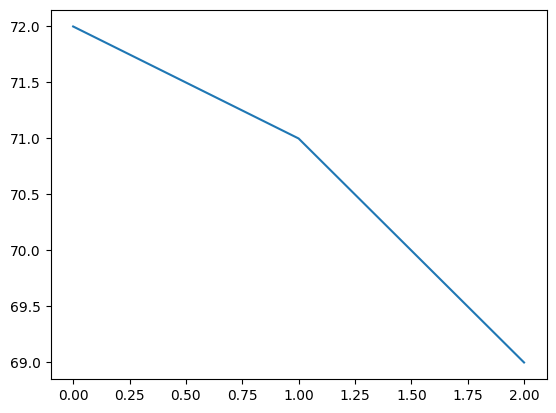

In [ ]:
plt.plot(listOfNumBuses)

In [ ]:
inc_red = [(listOfNumBuses[i]-listOfNumBuses[i+1]) for i in range(len(listOfNumBuses)-1)]

In [ ]:
print(inc_red)

[1, 2]


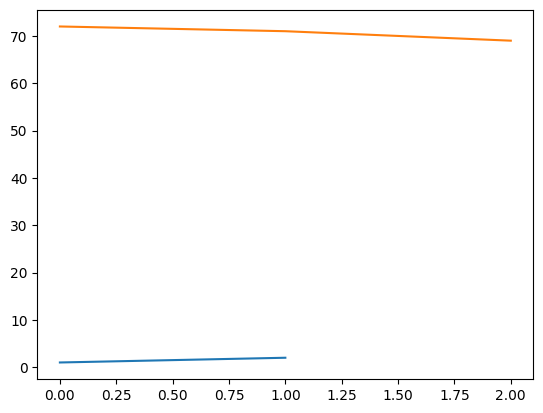

In [ ]:
plt.plot(inc_red)
plt.plot(listOfNumBuses)
plt.show()